# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
#Importando base de dados
renda = pd.read_csv('previsao_de_renda.csv')

In [4]:
#Interpretando os valores e tipos de variáveis 
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

Observando as informações transmitidas não há valores em branco em nenhuma das variáveis.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [7]:
#Para a análise proposta estruturarei uma nova tabela com as variáveis boleanas de posse e renda
renda = renda[['renda','posse_de_imovel', 'posse_de_veiculo']]
renda.head()

,renda,posse_de_imovel,posse_de_veiculo
0,3369.24,True,False
1,6096.14,True,True
2,5658.98,True,True
3,7246.69,False,True
4,4017.37,False,False


In [13]:
#Estudos dos valores totais para cada resultado boleano
pd.concat([renda['posse_de_imovel'].value_counts(), renda['posse_de_veiculo'].value_counts()], 
          axis=1, keys=['posse_de_imovel', 'posse_de_veiculo'])

,posse_de_imovel,posse_de_veiculo
True,10082,5833
False,4918,9167


<Axes: xlabel='posse_de_imovel', ylabel='renda'>

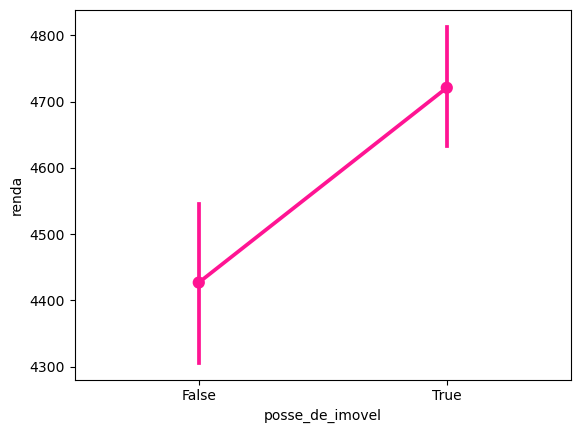

In [20]:
#Estudo da média de renda por resultados de posse
sns.pointplot(data=renda, x='posse_de_imovel', y='renda', dodge=True, color='deeppink')

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

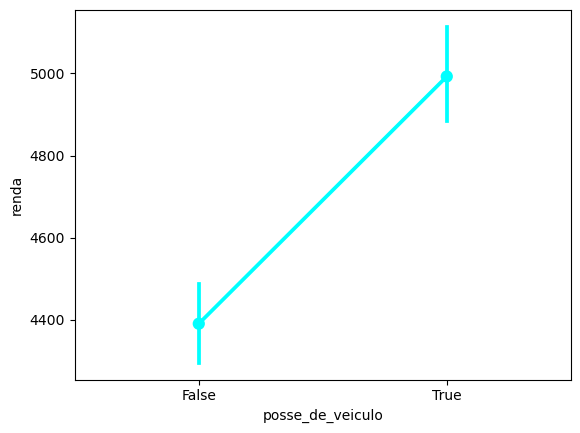

In [21]:
sns.pointplot(data=renda, x='posse_de_veiculo', y='renda', dodge=True, color='cyan')

Ambas variáveis de estudo não tem um grande desvio entre as médias portanto ambas parecem boas preditoras de renda.Percebemos que a variável de "posse_de_veiculo" tem menor desvio, portanto ela parece ser mais significante discriminação estatística para renda. 